## LSTM - Univariate - Model (Day by Day Forecast) - Phase - I

In [1]:
import pandas as pd

df_combined_new = pd.read_csv("../../data/baseline_training_food_page1.csv")
df_combined_new.head()

,date,items,pettah_average,pettah_min_value,pettah_max_value,food_inflation_Base_2013,percipitation,Bankrupt,pettah_range,pettah_midpoint
0,6/22/2015,Pulses (Rs/Kg)_Green Gram,194.6,190.0,200,110.2,1.12,0,10.0,195.0
1,6/22/2015,Pulses (Rs/Kg)_Red Dhal,177.6,168.0,186,110.2,1.12,0,18.0,177.0
2,6/22/2015,Potatoes (Rs/Kg)_Nuwaraeliya,134.0,130.0,140,110.2,1.12,0,10.0,135.0
3,6/22/2015,Onion (Rs/Kg)_Vedalan,134.0,130.0,140,110.2,1.12,0,10.0,135.0
4,6/22/2015,Pulses (Rs/Kg)_Cowpea,202.0,180.0,210,110.2,1.12,0,30.0,195.0


## Filter Date Range ( 2019-05-31 , 2024-05-31) - Nadu_2 Prices

In [2]:
import pandas as pd

# date column in datetime format
df_combined_new['date'] = pd.to_datetime(df_combined_new['date'])
# Filter the DataFrame
filtered_df = df_combined_new[
    (df_combined_new['items'] == "Rice (Rs/kg)_Nadu 2") &
    (df_combined_new['date'] >= '2019-05-31') &
    (df_combined_new['date'] <= '2024-05-31')
]
filtered_df.head()

,date,items,pettah_average,pettah_min_value,pettah_max_value,food_inflation_Base_2013,percipitation,Bankrupt,pettah_range,pettah_midpoint
8525,2019-05-31,Rice (Rs/kg)_Nadu 2,84.0,83.0,85,131.1,0.84,0,2.0,84.0
8534,2019-06-03,Rice (Rs/kg)_Nadu 2,84.0,83.0,85,134.5,9.28,0,2.0,84.0
8541,2019-06-06,Rice (Rs/kg)_Nadu 2,82.0,78.0,83,134.5,4.34,0,5.0,80.5
8550,2019-06-07,Rice (Rs/kg)_Nadu 2,81.0,78.0,84,134.5,19.28,0,6.0,81.0
8560,2019-06-10,Rice (Rs/kg)_Nadu 2,80.8,78.0,83,134.5,6.50,0,5.0,80.5


## Dropping one outlier and Duplicates

In [3]:
filtered_df = filtered_df[filtered_df['date'] != '2023-08-16']
filtered_df.reset_index(drop=True, inplace=True)
duplicates = filtered_df[filtered_df['date'].duplicated()]
filtered_df = filtered_df.drop_duplicates(subset=['date'], keep='first')
filtered_df.reset_index(drop=True, inplace=True)

## Read data from the cleaned and saved excel

In [4]:
filtered_df = pd.read_excel('../../data/Lstm_Dates.xlsx')
# Replace all missing values (NaN) in the 'items' column with 'Rice (Rs/kg)_Nadu 2'
filtered_df['items'] = filtered_df['items'].fillna('Rice (Rs/kg)_Nadu 2')
filtered_df.head(15)

,date,items,pettah_average,pettah_min_value,pettah_max_value,food_inflation_Base_2013,percipitation,Bankrupt,pettah_range,pettah_midpoint
0,2019-05-31,Rice (Rs/kg)_Nadu 2,84.0,83.0,85.0,131.1,0.84,0.0,2.0,84.0
1,2019-06-01,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-06-02,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-06-03,Rice (Rs/kg)_Nadu 2,84.0,83.0,85.0,134.5,9.28,0.0,2.0,84.0
4,2019-06-04,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2019-06-05,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2019-06-06,Rice (Rs/kg)_Nadu 2,82.0,78.0,83.0,134.5,4.34,0.0,5.0,80.5
7,2019-06-07,Rice (Rs/kg)_Nadu 2,81.0,78.0,84.0,134.5,19.28,0.0,6.0,81.0
8,2019-06-08,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2019-06-09,Rice (Rs/kg)_Nadu 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Final Dataframe Creation

In [5]:
# Use Interpolation pettah_average to Fill Missing Values
filtered_df['pettah_average'] = filtered_df['pettah_average'].interpolate(method='linear', limit_direction='both')

## Plotting the Pettah Average Price

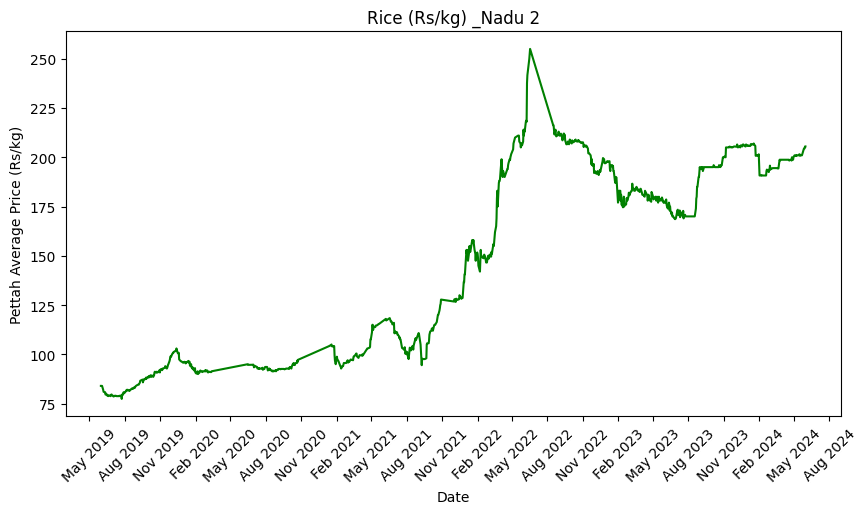

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Ensure 'date' is a datetime object
filtered_df['date'] = pd.to_datetime(filtered_df['date'])

# Set up the plot
fig, ax = plt.subplots(figsize=(10, 5))

# Plot pettah_average over time
sns.lineplot(data=filtered_df, x='date', y='pettah_average', ax=ax, color='green')

# Add titles and labels
ax.set_title('Rice (Rs/kg) _Nadu 2')
ax.set_xlabel('Date')
ax.set_ylabel('Pettah Average Price (Rs/kg)')

# Set x-axis format to show the month and year (e.g., Jan 2024)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

# Set the interval for x-axis ticks to every 3 months
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Drop Features 

In [7]:
# filtered_df.drop(columns=['items','percipitation', 'pettah_min_value', 'pettah_max_value', 'food_inflation_Base_2013', 'Bankrupt',
#                           'percipitation','pettah_range','pettah_midpoint','pettah_avg_sma_150','pettah_avg_sma_14','ema_7','ema_30'], inplace=True)

filtered_df.drop(columns=['items', 'pettah_min_value',
       'pettah_max_value', 'food_inflation_Base_2013', 'percipitation',
       'Bankrupt', 'pettah_range', 'pettah_midpoint'], inplace=True)

## Data Transformation

### Box - Cox Transformation

In [8]:
from scipy.stats import boxcox

# Apply Box-Cox Transformation
filtered_df['pettah_average'], lambda_value = boxcox(filtered_df['pettah_average'])

# Print the lambda used for the transformation
print(f"Lambda value: {lambda_value}")

Lambda value: -0.1207758043220706


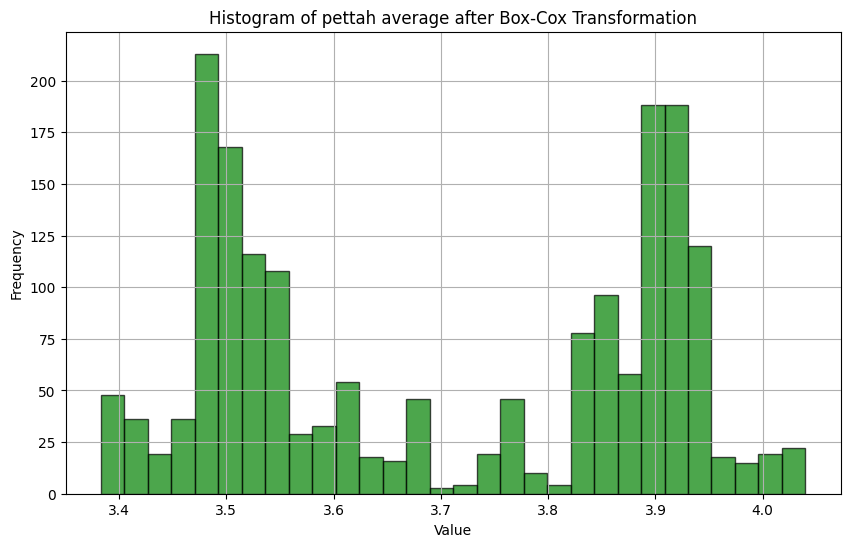

In [9]:
plt.figure(figsize=(10, 6))  # Optional: set the figure size
plt.hist(filtered_df['pettah_average'], bins=30, alpha=0.7, color='g', edgecolor='black')
plt.title('Histogram of pettah average after Box-Cox Transformation')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)  # Optional: Add a grid
plt.show()

## Data Scaling

### Min-Max Scaling

In [10]:
from sklearn.preprocessing import MinMaxScaler

# convert date column to index
filtered_df.set_index('date', inplace=True)

# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(filtered_df)

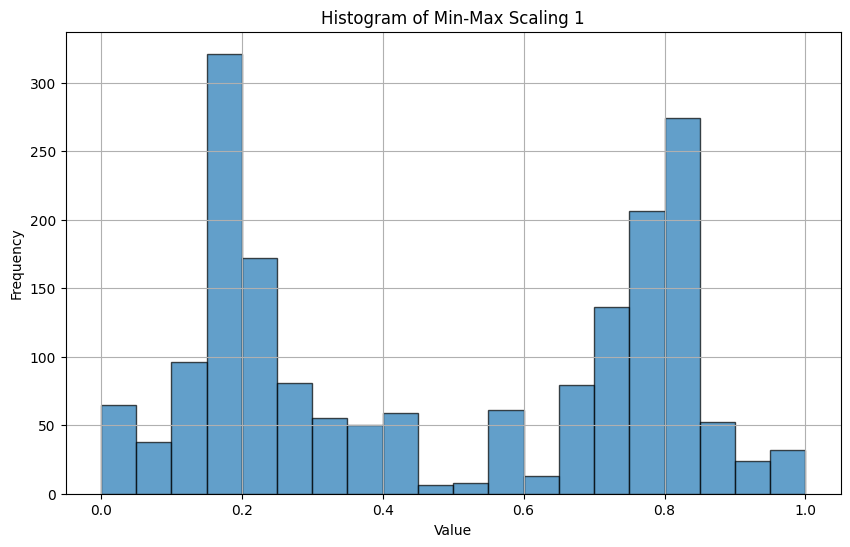

In [11]:
import matplotlib.pyplot as plt

features = scaled_data.shape[1]

# Plot histograms for each feature
for i in range(features):
    plt.figure(figsize=(10, 6))
    plt.hist(scaled_data[:, i], bins=20, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of Min-Max Scaling {i + 1}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

## Remove Zero Values

In [12]:
# Identify rows that have any '0' values
rows_with_zeros = (scaled_data == 0).any(axis=1)

# Filter out those rows (keep only rows without '0' values)
scaled_data = scaled_data[~rows_with_zeros]

## Train / Test Split - Sequence Generation

In [13]:
import numpy as np

# Assuming `filtered_df` is your DataFrame with a date index and scaled data
date_index = filtered_df.index  # Extract date index for tracking

# Define sequence length and features
sequence_length = 30  # Number of time steps in each sequence
num_features = len(filtered_df.columns)

# Create sequences, labels, and forecast dates
sequences = []
labels = []
forecast_dates = []

for i in range(len(scaled_data) - sequence_length):
    seq = scaled_data[i:i+sequence_length]
    label = scaled_data[i+sequence_length][0]  # Label is the target price for the next time step
    sequences.append(seq)
    labels.append(label)
    
    # Get the forecast date for this label (one day after the sequence end date)
    forecast_date = date_index[i + sequence_length]
    forecast_dates.append(forecast_date)

# Convert to numpy arrays
sequences = np.array(sequences)
labels = np.array(labels)
forecast_dates = np.array(forecast_dates)

# Split into train and test sets
train_size = int(0.8 * len(sequences))
train_x, test_x = sequences[:train_size], sequences[train_size:]
train_y, test_y = labels[:train_size], labels[train_size:]
train_dates, test_dates = forecast_dates[:train_size], forecast_dates[train_size:]

print("Train X shape:", train_x.shape)
print("Train Y shape:", train_y.shape)
print("Test X shape:", test_x.shape)
print("Test Y shape:", test_y.shape)
print("Train Dates shape:", train_dates.shape)
print("Test Dates shape:", test_dates.shape)


Train X shape: (1437, 30, 1)
Train Y shape: (1437,)
Test X shape: (360, 30, 1)
Test Y shape: (360,)
Train Dates shape: (1437,)
Test Dates shape: (360,)


## Model - Conv1D and Bidirectional LSTM Layers

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Conv1D, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Create the LSTM model
model = Sequential()

# Add a Conv1D layer as the initial layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(train_x.shape[1], train_x.shape[2])))

# # Add Bidirectional LSTM layers with dropout
# model.add(Bidirectional(LSTM(units=128, return_sequences=True), input_shape=(train_x.shape[1], train_x.shape[2])))
# model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(units=64, return_sequences=True)))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(units=32, return_sequences=False)))
model.add(Dropout(0.2))

# Add a dense output layer with 7 units for 7-day forecast
model.add(Dense(units=1, activation='linear'))  # Change units to 7 for 7-day forecast

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

c:\Users\VenuraP\AppData\Local\anaconda3\envs\hartipredict\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 28, 64)         │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 28, 256)        │       197,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 28, 256)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 28, 128)        │       164,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 28, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 403,521 (1.54 MB)

 Trainable params: 403,521 (1.54 MB)

 Non-trainable params: 0 (0.00 B)

## Model Training with Hyperparameters

In [16]:
# # Define callbacks
# # early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# # patience = patience=5: Number of epochs to wait for improvement in validation loss before stopping. If validation loss does not improve for 5 consecutive epochs, training will stop
model_checkpoint = ModelCheckpoint('../../models/Nadu_2_prediction/Day by Day Model/daybyday_model.keras', monitor='val_loss', save_best_only=True)

# Train the model
history = model.fit(
    train_x, train_y,
    epochs=100,
    batch_size=32,
    validation_split=0.2,  # Use part of the training data as validation
    callbacks=[model_checkpoint] # Currently, only save the best epoch validation loss to the best validation loss observed so far
)

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 79ms/step - loss: 0.0359 - val_loss: 3.1773e-04
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0029 - val_loss: 0.0016
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0023 - val_loss: 2.1729e-04
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.0024 - val_loss: 0.0013
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0020 - val_loss: 0.0023
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0017 - val_loss: 0.0018
Epoch 9/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0017 - val_loss: 0.0039
Epoch 10/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - loss: 0.0024 - val_loss: 2.0247e-04
Epoch 11/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - loss: 0.0018 - val_loss: 1.5058e-04
Epoch 12/100
36/36 ━━━━━━━━━━━━━━━━

## Train Val Loss 

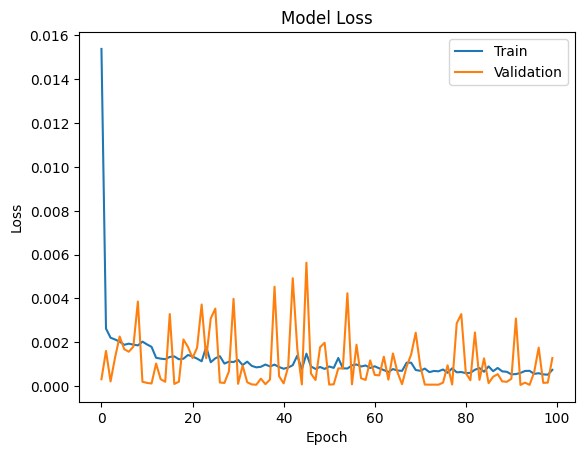

In [17]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## Last 70 Epochs 

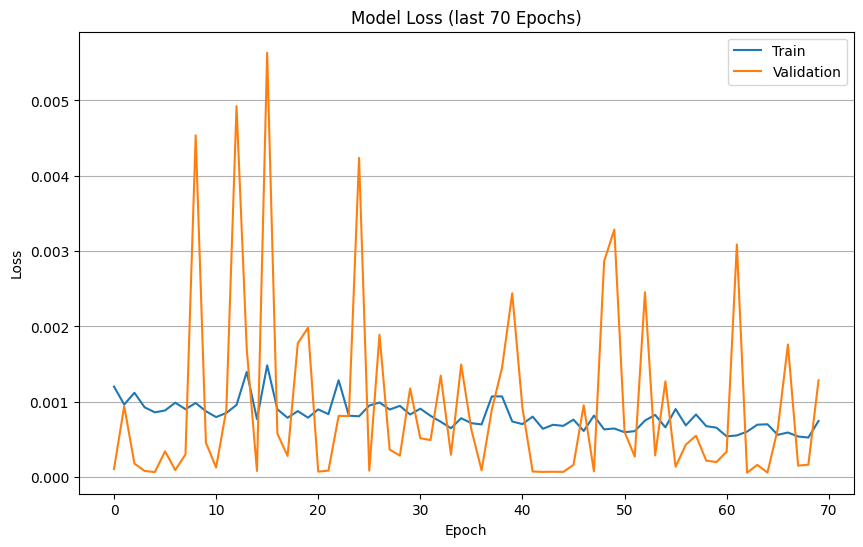

In [18]:
import matplotlib.pyplot as plt

# Get the total number of epochs
total_epochs = len(history.history['loss'])

# Define the range for the 70 epochs
last_70_epochs = range(min(70, total_epochs))

# Slice the loss and validation loss for the last 70 epochs
loss = history.history['loss'][-70:]
val_loss = history.history['val_loss'][-70:]

# Plot training & validation loss values for the last 70 epochs
plt.figure(figsize=(10, 6))
plt.plot(last_70_epochs, loss)
plt.plot(last_70_epochs, val_loss)
plt.title('Model Loss (last 70 Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

# Add horizontal grid lines
plt.grid(axis='y')

plt.show()

## Load Model

In [19]:
import tensorflow as tf
best_model = tf.keras.models.load_model('../../models/Nadu_2_prediction/Day by Day Model/daybyday_model.keras')

## Error Analysis on Training set

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

predictions_train = best_model.predict(train_x)

# Calculate evaluation metrics
r2 = r2_score(train_y, predictions_train)
mae = mean_absolute_error(train_y, predictions_train)
mse = mean_squared_error(train_y, predictions_train)
rmse = np.sqrt(mse)

print("Train R-squared:", r2)
print("Train Mean Absolute Error (MAE):", mae)
print("Train set Mean Squared Error (MSE):", mse)
print("Train set Root Mean Squared Error (RMSE):", rmse)

45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step
Train R-squared: 0.9979261271983282
Train Mean Absolute Error (MAE): 0.008377608733442237
Train set Mean Squared Error (MSE): 0.00017110313579068545
Train set Root Mean Squared Error (RMSE): 0.013080639731705994


## Error Analysis on Test Set 

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Predict temperatures using the trained model
predictions_test = best_model.predict(test_x)

# Calculate evaluation metrics
r2 = r2_score(test_y, predictions_test)
mae = mean_absolute_error(test_y, predictions_test)
mse = mean_squared_error(test_y, predictions_test)
rmse = np.sqrt(mse)

print("R-squared:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
R-squared: 0.9776729108361976
Mean Absolute Error (MAE): 0.005867032216773343
Mean Squared Error (MSE): 6.388416649302649e-05
Root Mean Squared Error (RMSE): 0.007992757127113679


## Prediction on Test Set

In [22]:
prediction = best_model.predict(test_x)  # Shape: (num_samples, timesteps=sequence_length, features)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


## Inverse Transformation (Scalers -->Transformers-->Actual Prices)

In [23]:
from scipy.special import inv_boxcox

# Inverse transformation for test_y
true_prices = []
for row in test_y:
    # Reshape each row to the scaler's feature shape and inverse transform
    row_copies = np.repeat(row.reshape(-1, 1), test_x.shape[-1], axis=-1)
    # Apply inverse scaling and Box-Cox
    row_true_price = scaler.inverse_transform(row_copies)[:, 0]  # Keep only the first feature's original values min-max scaling
    row_true_price = inv_boxcox(row_true_price, lambda_value)    # Apply Box-Cox inverse
    true_prices.append(row_true_price)

# Convert list back to a numpy array
true_prices = np.array(true_prices)

# Inverse transformation for predictions
predicted_prices = []
for row in prediction:
    # Reshape each row to match the scaler's shape and inverse transform
    row_copies = np.repeat(row.reshape(-1, 1), test_x.shape[-1], axis=-1)
    # Apply inverse scaling and Box-Cox
    row_predicted_price = scaler.inverse_transform(row_copies)[:, 0] # Keep only the first feature's original values min-max scaling
    row_predicted_price = inv_boxcox(row_predicted_price, lambda_value) # Apply Box-Cox inverse
    predicted_prices.append(row_predicted_price)

# Convert list back to a numpy array
predicted_prices = np.array(predicted_prices)

print(true_prices.shape)
print(predicted_prices.shape)

(360, 1)
(360, 1)


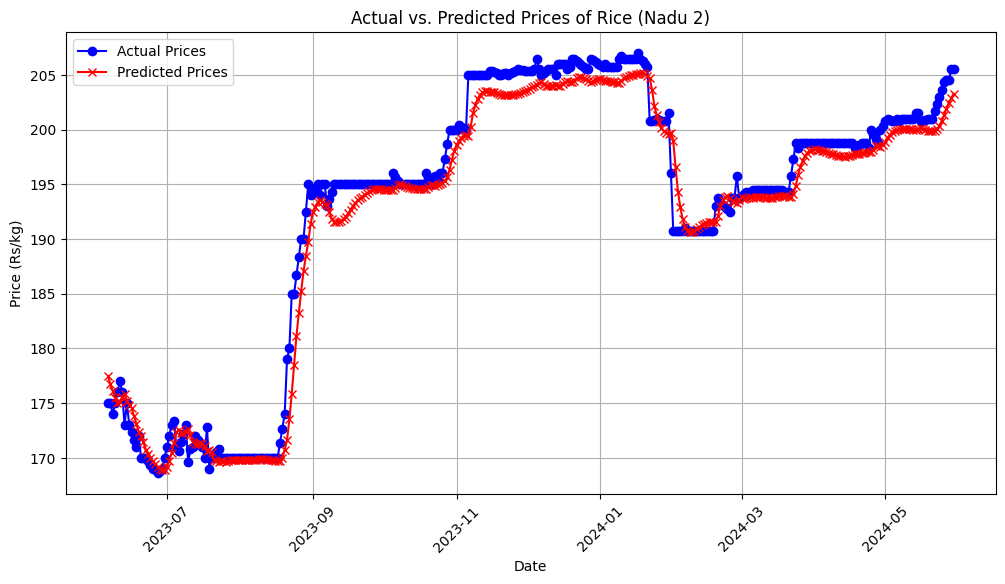

In [24]:
import matplotlib.pyplot as plt

# Ensure `test_dates` is a 1D array of dates corresponding to each forecasted period in `test_y`
# and that `true_prices` and `predicted_prices` have compatible shapes for plotting.

# Plotting the actual vs. predicted prices
plt.figure(figsize=(12, 6))

# Plot true prices
plt.plot(test_dates, true_prices, label="Actual Prices", marker='o', color='blue')

# Plot predicted prices
plt.plot(test_dates, predicted_prices, label="Predicted Prices", marker='x', color='red')

# Add labels and title
plt.xlabel("Date")
plt.ylabel("Price (Rs/kg)")
plt.title("Actual vs. Predicted Prices of Rice (Nadu 2)")
plt.legend()
plt.grid(True)

# Rotate date labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()
